The goal is to implement several clustering algorithms using some datasets.

**Requirements:**
1. You should include k-means, spectral clustering, DBSCAN, and Hierarchical clustering in your solution.
2. For Hierarchical clustering, you should use at least 3 different similarity criteria. 
3. You should also try another clustering algorithm which is not covered in the lecture. You should write a short paragraph to explain the theory of the algorithm you select.
4. Visualize your results like given sample plot.
5. You should carefully choose the hyperparameters (e.g. number of clusters, scale of kernels in spectral clustering). Please clearly state your choices for each model and each dataset, and then explain your choices.


**Grading items:**
1. Your codes are correct and accompanied with comments.
2. Your visualization results.
3. Hyperparameter selection and reasoning.

**Dataset:** (for the first three datasets, you should not use the last column when you run clustering algorithms)
1. Aggregation: url="https://raw.githubusercontent.com/liaochunyang/PIC16/main/PIC16B/05_Clustering/Aggregation.txt"
2. jain: url="https://raw.githubusercontent.com/liaochunyang/PIC16/main/PIC16B/05_Clustering/jain.txt"
3. R15: url="https://raw.githubusercontent.com/liaochunyang/PIC16/main/PIC16B/05_Clustering/R15.txt"
4. circle: url="https://raw.githubusercontent.com/liaochunyang/PIC16/main/PIC16B/05_Clustering/circle.csv"

**Sample plot:**
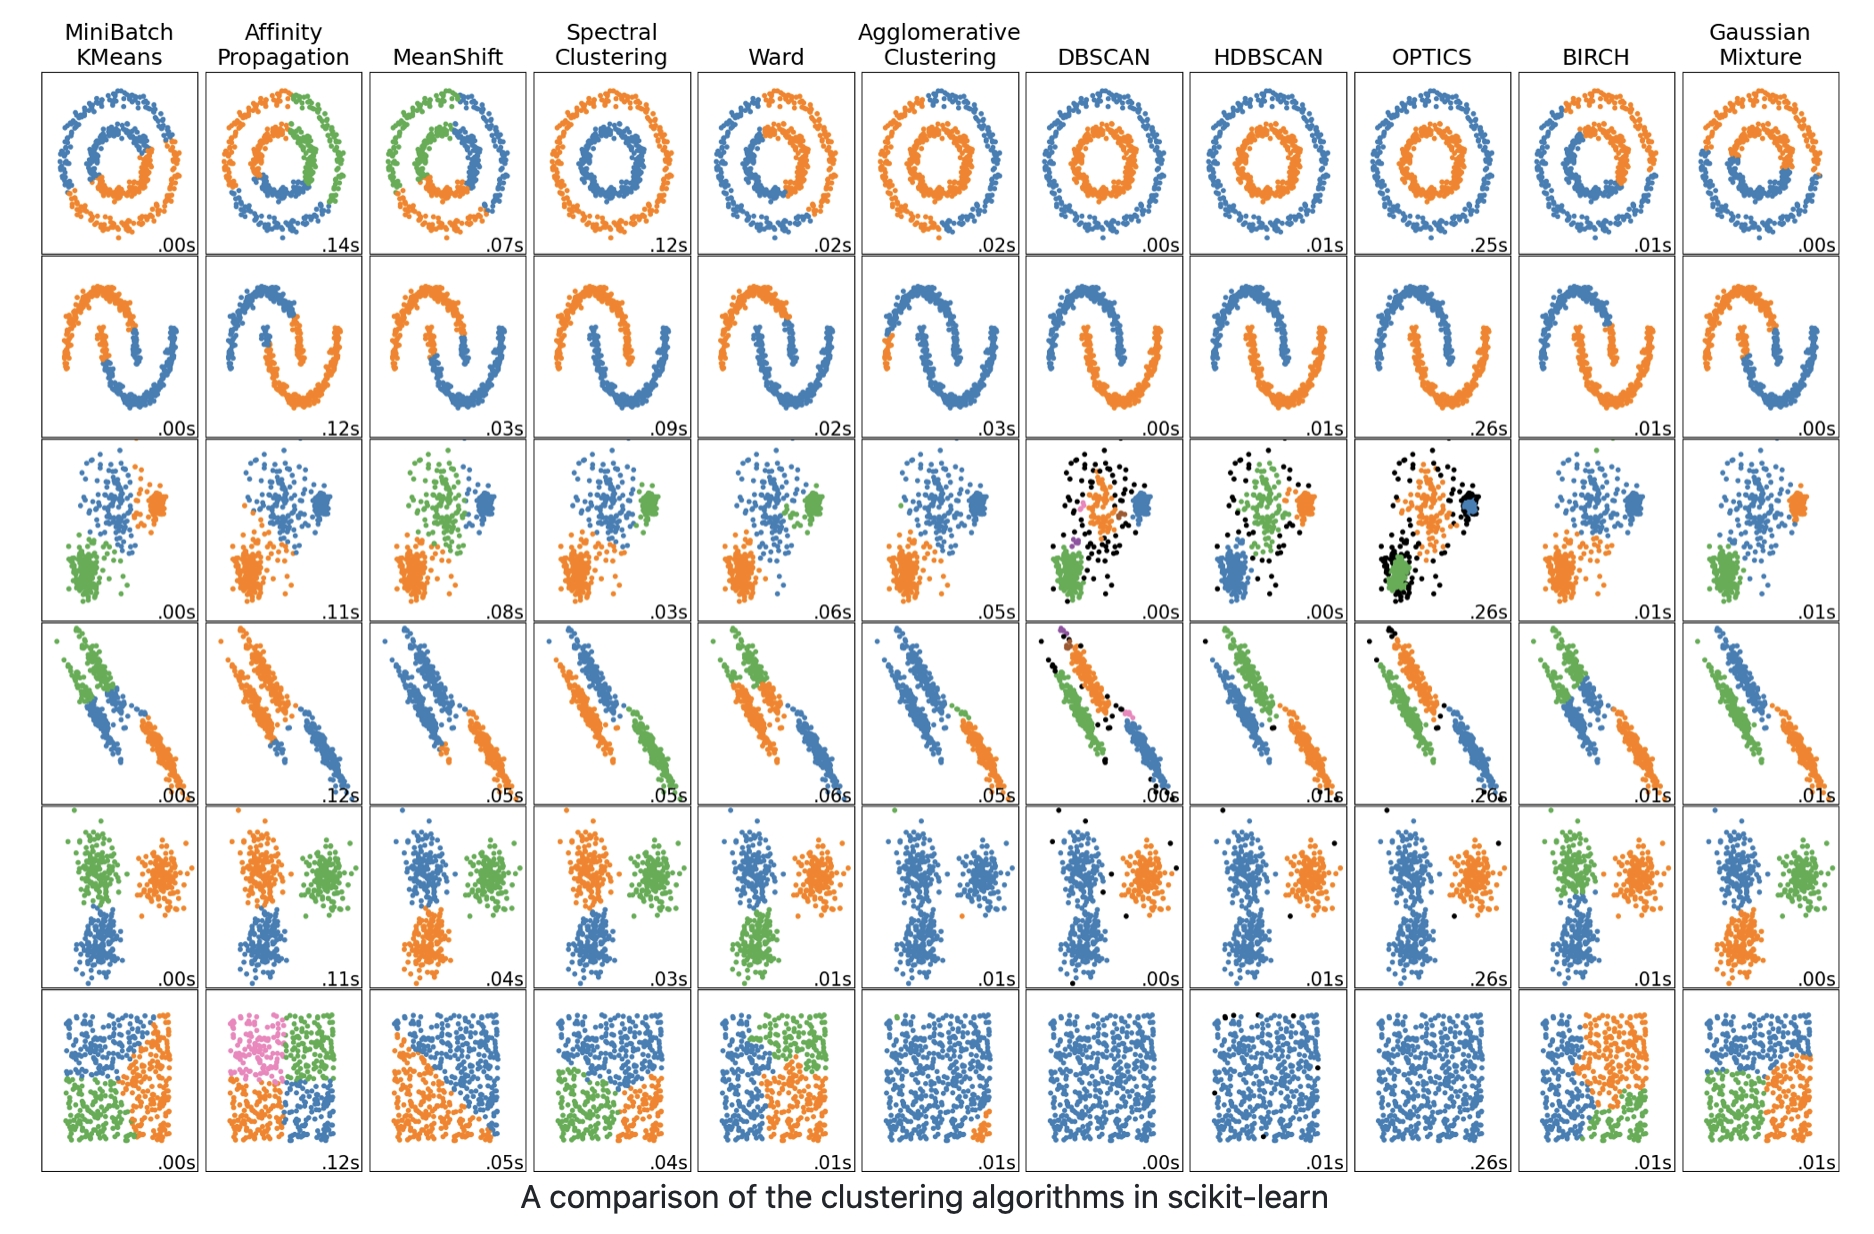

**Computation times are also included in my sample plots, you do NOT need to include them.**

In [1]:
#importing the necessary packages
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, SpectralClustering, DBSCAN, AgglomerativeClustering
from sklearn.mixture import GaussianMixture

In [2]:
#importing the data
data_aggregation = pd.read_csv("https://raw.githubusercontent.com/liaochunyang/PIC16/main/PIC16B/05_Clustering/Aggregation.txt", delimiter="\t", header=None)
data_jain = pd.read_csv("https://raw.githubusercontent.com/liaochunyang/PIC16/main/PIC16B/05_Clustering/jain.txt", delimiter="\t", header=None)
data_r15 = pd.read_csv("https://raw.githubusercontent.com/liaochunyang/PIC16/main/PIC16B/05_Clustering/R15.txt", delimiter="\t", header=None)
data_circle = pd.read_csv("https://raw.githubusercontent.com/liaochunyang/PIC16/main/PIC16B/05_Clustering/circle.csv")

#selecting the data range to not include last row
data_aggregation = data_aggregation.iloc[:, :-1].values
data_jain = data_jain.iloc[:, :-1].values
data_r15 = data_r15.iloc[:, :-1].values
data_circle = data_circle.values

In [3]:
#functions for plotting and clustering labeling

def plot_clusters(ax, data, labels):
    """
    Plot the clusters on given axes 
    
    Args:
    ax (matplotlib axes): The axes for the plot
    data (np array): Data to be clustered; shape (n_samples, n_features)
    labels (np array): Labels for points in the cluster
    """
    ax.scatter(data[:, 0], data[:, 1], c=labels, cmap='viridis')
    ax.set_xticks([])
    ax.set_yticks([])

def kmeans_clustering(ax, data, n_clusters):
    """
    Function for K-means clustering and plotting cluster
    
    Args:
    ax (matplotlib axes): The axes for the plot
    data (np array): Data to be clustered; shape (n_samples, n_features)
    n_clusters (int): number of clusters in model
    """
    kmeans = KMeans(n_clusters=n_clusters, random_state=0)
    labels = kmeans.fit_predict(data)
    plot_clusters(ax, data, labels)

def spectral_clustering(ax, data, n_clusters, gamma):
    """
    Function for Spectral Clustering, plots the clusters
    
    Args:
    ax (matplotlib axes): The axes for the plot.
    data (np array): Data to be clustered; shape (n_samples, n_features)
    n_clusters (int): number of clusters in model
    gamma (float): kernel coefficient
    """
    spectral = SpectralClustering(n_clusters=n_clusters, gamma=gamma, random_state=0)
    labels = spectral.fit_predict(data)
    plot_clusters(ax, data, labels)

def dbscan_clustering(ax, data, eps, min_samples):
    """
    Function for DBSCAN clustering, plots the clusters
    
    Args:
    ax (matplotlib axes): The axes for the plot.
    data (np array): Data to be clustered; shape (n_samples, n_features)
    eps (float): max distance between two samples
    min_samples (int): The number of samples in a neighborhood
    """
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    labels = dbscan.fit_predict(data)
    plot_clusters(ax, data, labels)

def hierarchical_clustering(ax, data, n_clusters, linkage):
    """
    Function for Hierarchical Clustering, plots the clusters
    
    Args:
    ax (matplotlib axes): The axes for the plot.
    data (np array): Data to be clustered; shape (n_samples, n_features)
    n_clusters (int): number of clusters
    linkage (str): linkage criterion 
    """
    hierarchical = AgglomerativeClustering(n_clusters=n_clusters, linkage=linkage)
    labels = hierarchical.fit_predict(data)
    plot_clusters(ax, data, labels)

def gmm_clustering(ax, data, n_components):
    """
    Function for Gaussian Mixture Model clustering, plots the clusters.
    
    Args:
    ax (matplotlib axes): The axes for the plot.
    data (np array): Data to be clustered; shape (n_samples, n_features).
    n_components (int): The number of mixture components.
    """
    gmm = GaussianMixture(n_components=n_components, random_state=0)
    labels = gmm.fit_predict(data)
    plot_clusters(ax, data, labels)

/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/manifold/_spectral_embedding.py:393: UserWarning: Exited at iteration 2000 with accuracies 
[7.76484987e-15 5.08343574e-06 1.51908256e-05]
not reaching the requested tolerance 5.558133125305176e-06.
Use iteration 1899 instead with accura

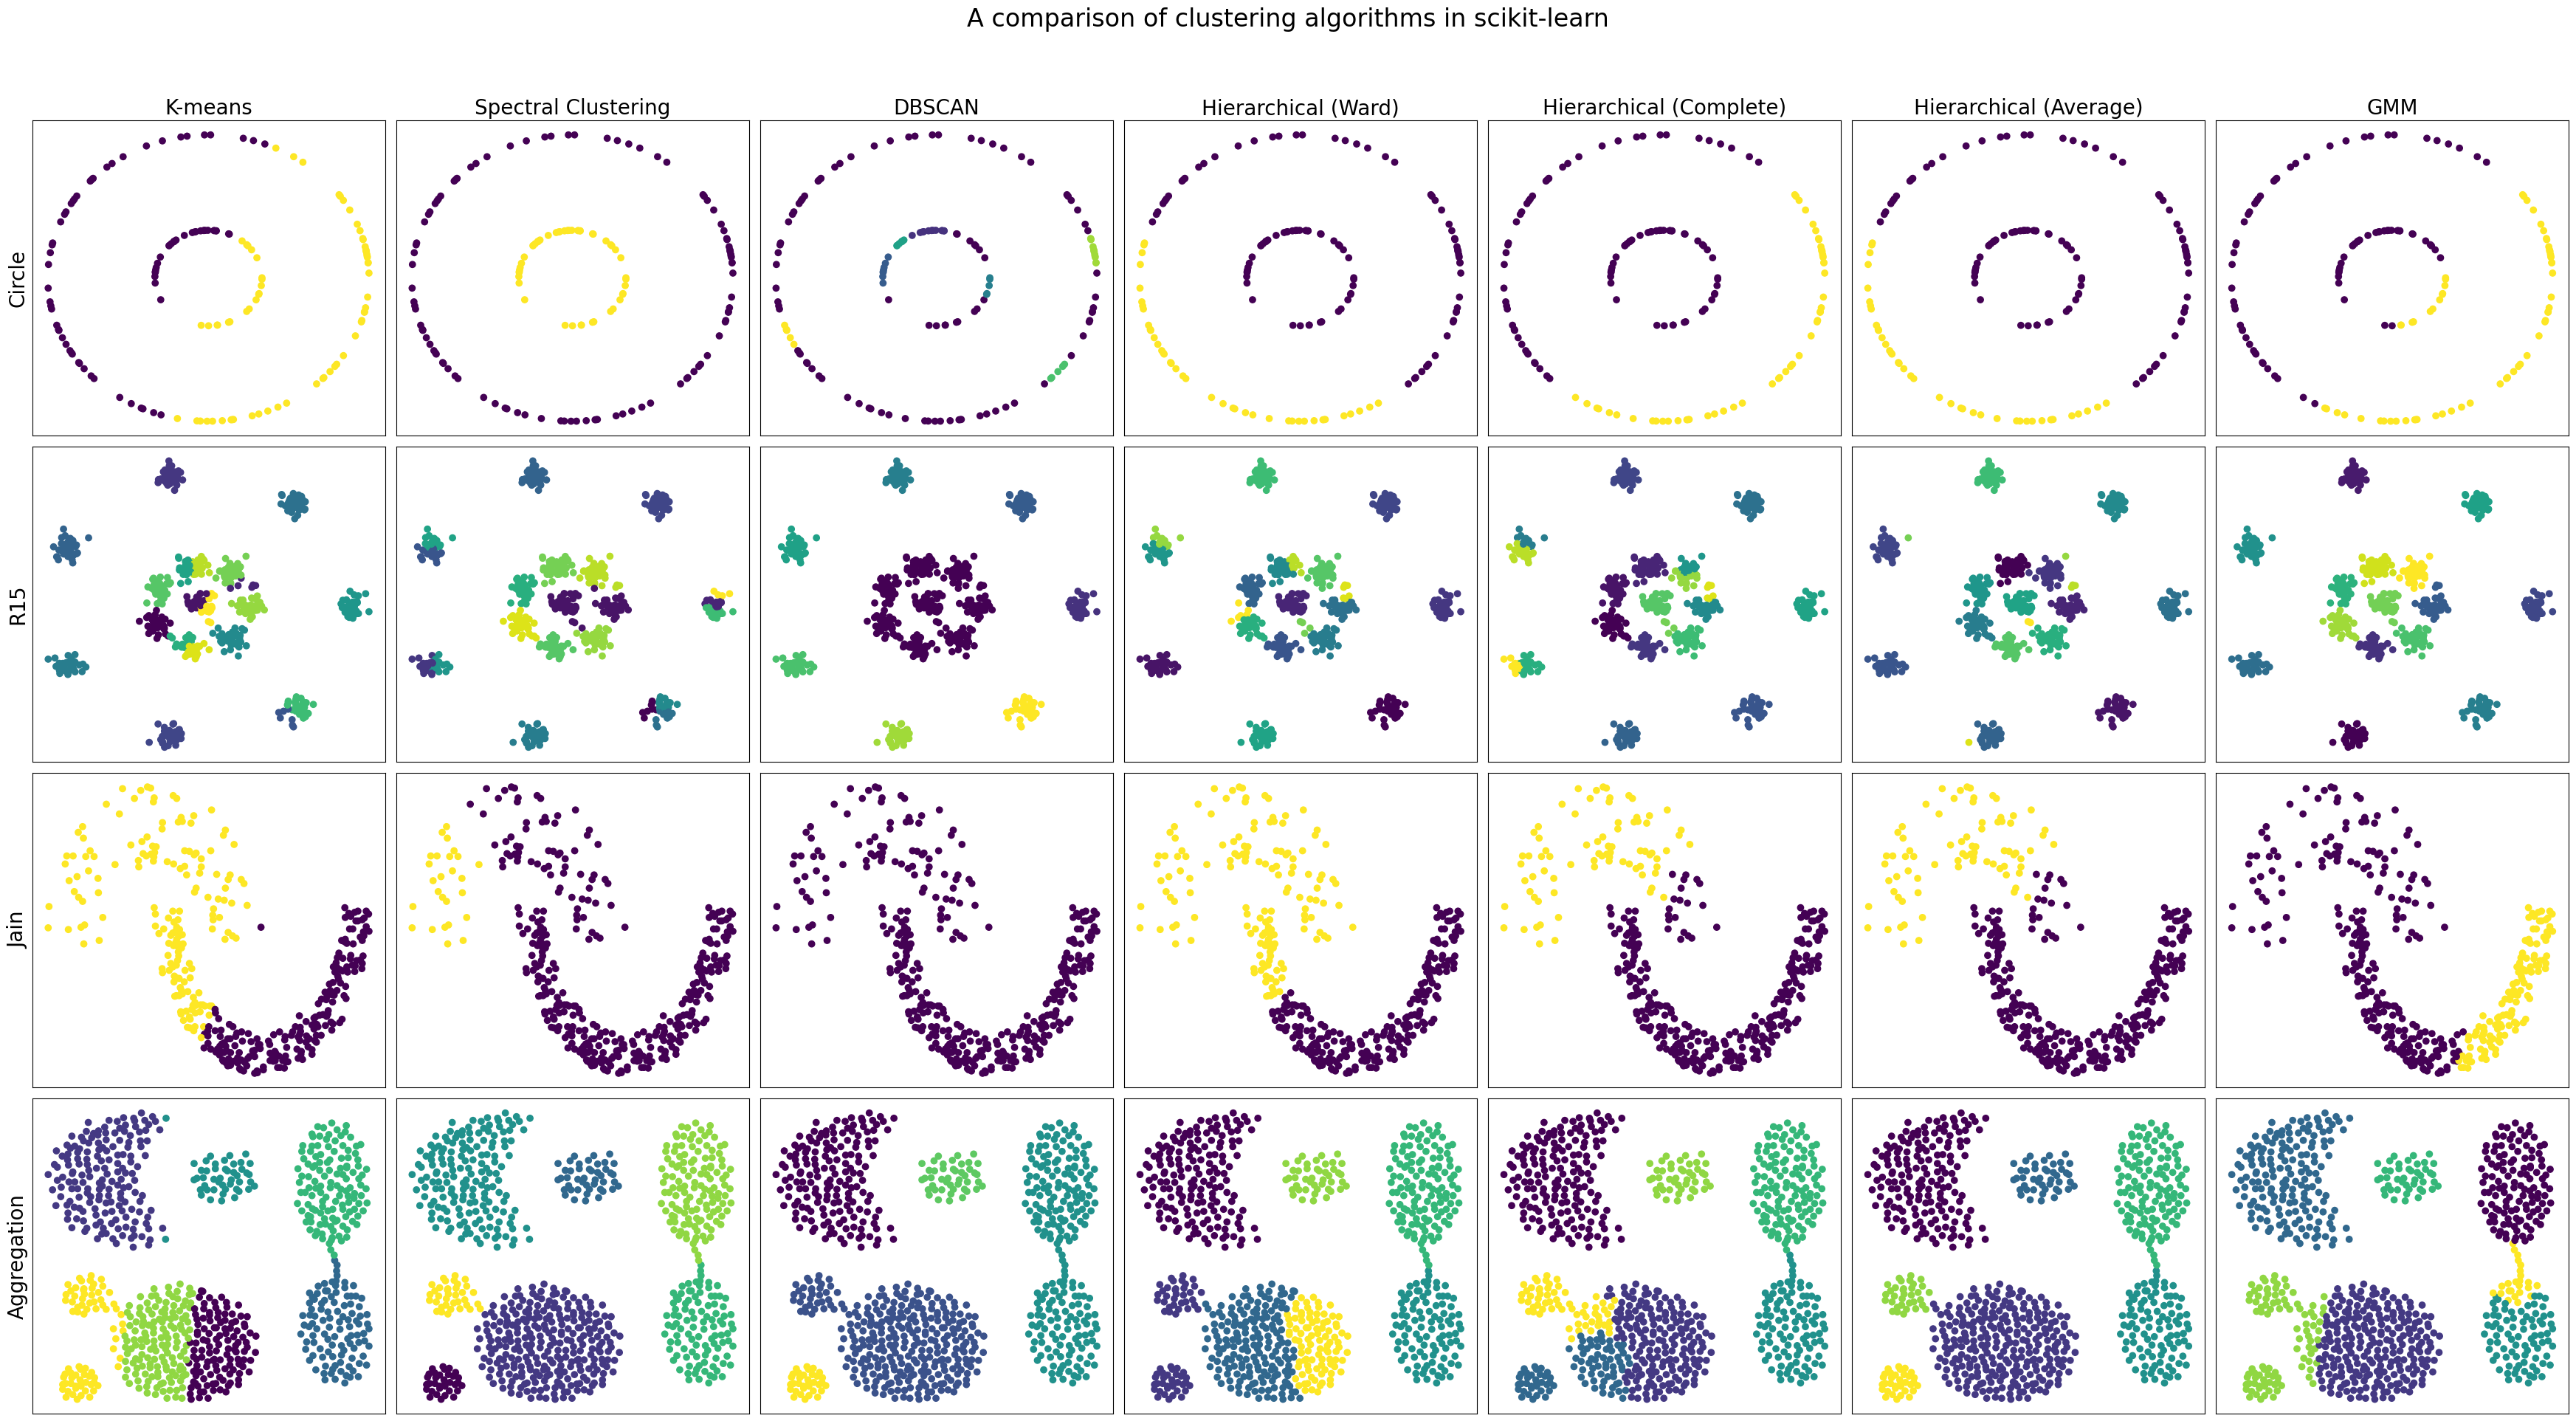

In [4]:
# plot all results in subplots
fig, axs = plt.subplots(4, 7, figsize=(35, 20))

#Create data and assign hyperparameters
datasets = [
    ('Circle', data_circle, 2, 2, 0.2, 5, 2),
    ('R15', data_r15, 20, 0.2, 1, 3, 15),
    ('Jain', data_jain, 2, 2, 0.3, 5, 2),
    ('Aggregation', data_aggregation, 7, 0.1, 2.5, 4, 7)
]

# Iterating through datasets
for i, (data_name, data, n_clusters, gamma, eps, min_samples, n_components) in enumerate(datasets):
    kmeans_clustering(axs[i, 0], data, n_clusters)
    spectral_clustering(axs[i, 1], data, n_clusters, gamma)
    dbscan_clustering(axs[i, 2], data, eps, min_samples)
    hierarchical_clustering(axs[i, 3], data, n_clusters, 'ward')
    hierarchical_clustering(axs[i, 4], data, n_clusters, 'complete')
    hierarchical_clustering(axs[i, 5], data, n_clusters, 'average')
    gmm_clustering(axs[i, 6], data, n_components)

# assign column titles
column_titles = ['K-means', 'Spectral Clustering', 'DBSCAN', 'Hierarchical (Ward)', 'Hierarchical (Complete)', 'Hierarchical (Average)', 'GMM']
for ax, col in zip(axs[0], column_titles):
    ax.set_title(col, size = 20)

# assign row labels for each data set
row_titles = ['Circle', 'R15', 'Jain', 'Aggregation']
for ax, row in zip(axs[:,0], row_titles):
    ax.set_ylabel(row, size = 20)

# Setting the overall titles
fig.suptitle('A comparison of clustering algorithms in scikit-learn', size=24)
plt.tight_layout(rect=[0, 0.02, 1, 0.95])
plt.show()

# GMM Clustering
I chose GMM clustering as the additional model. The Gaussian Mixture Models is a model that builds on the k-means model. Rather than just looking at the distance from the centroid in the k-means model, the GMM model allows one point to belong to different clusters with different probabilities. The model would assign a probability to each point and use expected maximation methods to find the maximize the modle based on the data. This means that the model can be more flexible when tested on different data sets, especially for data where the cluster might not be sphereical. 

# Hyper-parameter choices explanations
Circle: 
- K-means: n_cluster = 2 because there are 2 circles formed by the data
- Spectral clustering: n_cluster = 2, gamma = 2 because I wanted point to be closer to be recognized as one cluster
- DBSCAN: eps = 1, min_sample = 3 because I wanted to find dense regions related to the clusters
- Hierachical clustering: n_clusters = 2 beacause there are 2 circles in the data
- GMM: n_components = 15 because there are 2 circles in the data

R15: 
- K-means: n_cluster = 15 because there are 15 clusters in the data
- Spectral clustering: n_cluster = 15, gamma = 0.1 to capture closely clustered points 
- DBSCAN: eps = 1, min_sample = 3 to find dense regions around the clusters
- Hierachical clustering: n_clusters = 15 beacause there are 15 clusters in the data
- GMM: n_components = 15 because there are 15 clusters in the data

Jain: 
- K-means: n_cluster = 2 because there are 2 separated shapes in the data
- Spectral clustering: n_cluster = 2, gamma = 2 to capture closely clustered points 
- DBSCAN: eps = 0.3, min_sample = 5 to find dense regions around clusters
- Hierachical clustering: n_clusters = 2 beacause there are 2 separated shapes  in the data
- GMM: n_components = 2 because there are 2 separated shapes  in the data

Aggregation: 
- K-means: n_cluster = 7 because there are 7 clusters in the data
- Spectral clustering: n_cluster = 7, gamma = 0.1 to capture closely clustered points 
- DBSCAN: eps = 2.5, min_sample = 4 to find dense regions around the clusters
- Hierachical clustering: n_clusters = 7 beacause there are 7 clusters in the data
- GMM: n_components = 7 because there are 7 clusters in the data